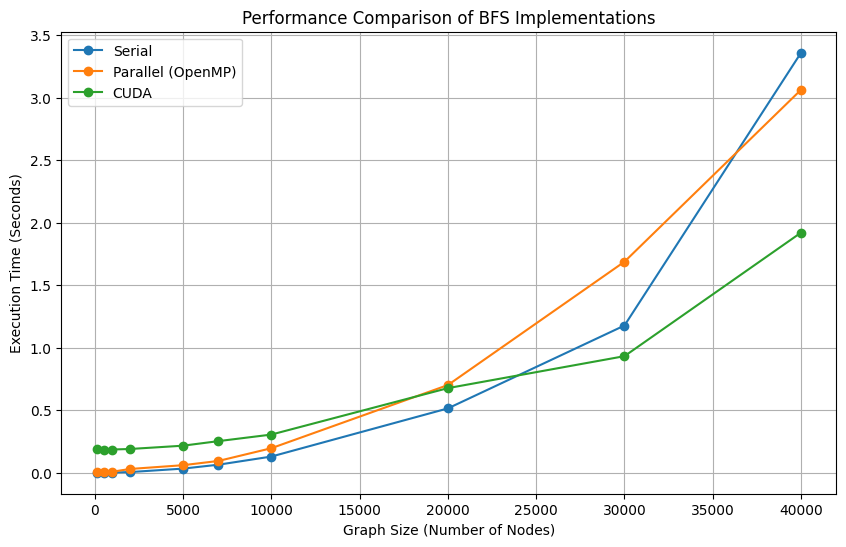

,Data 1 (100 nodes),Data 2 (500 nodes),Data 3 (1000 nodes),Data 4 (2000 nodes),Data 5 (5000 nodes),Data 6 (7000 nodes),Data 7 (10000 nodes),Data 8 (20000 nodes),Data 9 (30000 nodes),Data 10 (40000 nodes)
Serial,0.000021,0.000339,0.001523,0.005261,0.032907,0.064149,0.129366,0.514770,1.178006,3.360784
Parallel (OpenMP),0.002494,0.004777,0.008294,0.030010,0.060190,0.094116,0.196068,0.701585,1.688498,3.064540
CUDA,0.191131,0.185290,0.185832,0.189960,0.216338,0.252791,0.305257,0.676952,0.932703,1.921451


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from run.txt
data = {
    "Graph Size": [100, 500, 1000, 2000, 5000, 7000, 10000, 20000, 30000, 40000],
    "Serial": [0.000021, 0.000339, 0.001523, 0.005261, 0.032907, 0.064149, 0.129366, 0.514770, 1.178006, 3.360784],
    "Parallel (OpenMP)": [0.002494, 0.004777, 0.008294, 0.030010, 0.060190, 0.094116, 0.196068, 0.701585, 1.688498, 3.064540],
    "CUDA": [0.191131, 0.185290, 0.185832, 0.189960, 0.216338, 0.252791, 0.305257, 0.676952,  0.932703, 1.9214511]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
for method in ["Serial", "Parallel (OpenMP)", "CUDA"]:
    plt.plot(df["Graph Size"], df[method], marker='o', label=method)

plt.xlabel('Graph Size (Number of Nodes)')
plt.ylabel('Execution Time (Seconds)')
plt.title('Performance Comparison of BFS Implementations')
plt.legend()
plt.grid(True)
plt.show()

# Creating a table for the requested format
table_format = df.set_index('Graph Size').T
table_format.columns = [f'Data {i+1} ({size} nodes)' for i, size in enumerate(df["Graph Size"])]
table_format



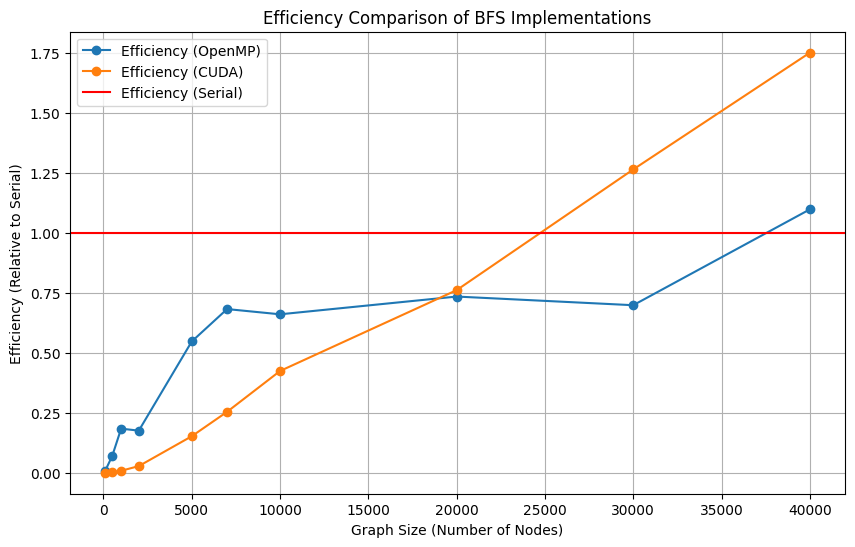

,Graph Size,Efficiency (OpenMP),Efficiency (CUDA)
0,100,0.008420,0.000110
1,500,0.070965,0.001830
2,1000,0.183627,0.008196
3,2000,0.175308,0.027695
4,5000,0.546719,0.152109
5,7000,0.681595,0.253763
6,10000,0.659802,0.423794
7,20000,0.733724,0.760423
8,30000,0.697665,1.263002
9,40000,1.096668,1.749086


In [4]:

df["Efficiency (OpenMP)"] = df["Serial"] / df["Parallel (OpenMP)"]
df["Efficiency (CUDA)"] = df["Serial"] / df["CUDA"]

# Plotting efficiency
plt.figure(figsize=(10, 6))


plt.plot(df["Graph Size"], df["Efficiency (OpenMP)"], marker='o', label='Efficiency (OpenMP)')
plt.plot(df["Graph Size"], df["Efficiency (CUDA)"], marker='o', label='Efficiency (CUDA)')
plt.axhline(y=1, color='r', linestyle='-', label='Efficiency (Serial)')
plt.xlabel('Graph Size (Number of Nodes)')
plt.ylabel('Efficiency (Relative to Serial)')
plt.title('Efficiency Comparison of BFS Implementations')
plt.legend()
plt.grid(True)
plt.show()

df[["Graph Size", "Efficiency (OpenMP)", "Efficiency (CUDA)"]]

